# Questão 2: Circuito RLC (Método da Bissecção)

**Objetivo:** Determinar o valor da resistência $R$ em um circuito RLC de modo que a carga dissipe para 1% do valor original em $t = 0.05s$.

### Modelagem Matemática
A carga $q(t)$ é dada pela equação:

$$
q(t) = q_0 e^{-\frac{Rt}{2L}} \cos\left[\sqrt{\frac{1}{LC} - \left(\frac{R}{2L}\right)^2} t\right]
$$

Onde:
* $L = 5 H$
* $C = 10^{-4} F$

Queremos encontrar $R$ tal que $\frac{q(t)}{q_0} = 0.01$. Portanto, precisamos encontrar a raiz da função $f(R)$:

$$
f(R) = e^{-\frac{Rt}{2L}} \cos\left[\sqrt{\frac{1}{LC} - \left(\frac{R}{2L}\right)^2} t\right] - 0.01 = 0
$$

**Método:** Utilizaremos o **Método da Bissecção** com **21 iterações** fixas

In [6]:
# Célula 1: Imports
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

from questao_02 import metodo_bisseccao


In [7]:
# Célula 2: Dados do Circuito RLC
L = 5.0           
C = 1e-4          
t_alvo = 0.05     
razao_alvo = 0.01 # 1% da carga inicial

def equacao_circuito(R):
    """
    Função f(R) que queremos zerar.
    Representa: (Carga calculada / Carga inicial) - 0.01
    """

    alpha = R / (2 * L)
    omega0_sq = 1 / (L * C)
    discriminante = omega0_sq - alpha**2

    # evita raiz de negativo
    if discriminante < 0:
        return 1000.0 
        
    omega = np.sqrt(discriminante)
    
    # Equação 
    return np.exp(-alpha * t_alvo) * np.cos(omega * t_alvo) - razao_alvo

Teste de Sinais: f(0) = -0.63 | f(400) = 0.06

RESPOSTA FINAL:
Resistência R = 328.1515 Ohms
Erro residual = 8.27e-08


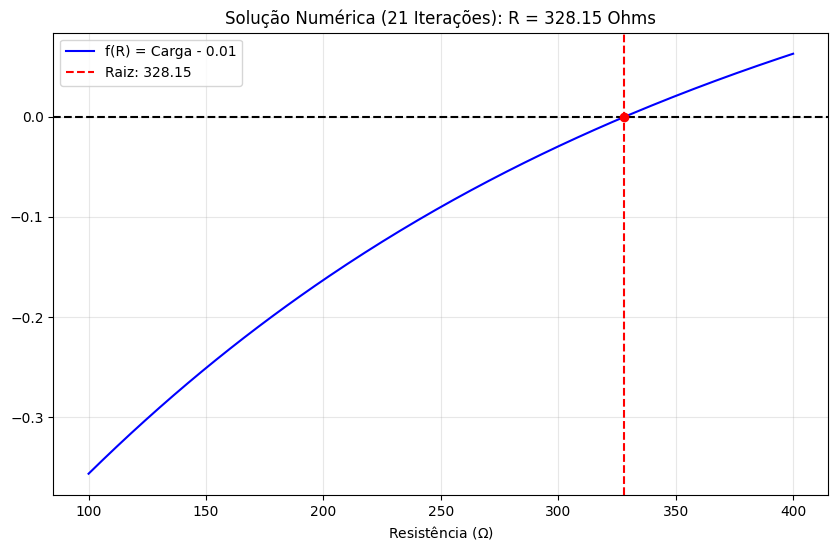

In [8]:
# Célula 3: Rodando a Bisseção e Plotando
# intervalo inicial
a = 0
b = 400 

try:
    # para ver os sinais
    val_a = equacao_circuito(a)
    val_b = equacao_circuito(b)
    print(f"Teste de Sinais: f({a}) = {val_a:.2f} | f({b}) = {val_b:.2f}")
    
    if val_a * val_b >= 0:
        print("ALERTA: O intervalo ainda é ruim! Tente aumentar 'b'.")
    else:
        # Chama a função
        R_final, historico = metodo_bisseccao(equacao_circuito, a, b, iteracoes=21)

        print(f"\nRESPOSTA FINAL:")
        print(f"Resistência R = {R_final:.4f} Ohms")
        print(f"Erro residual = {equacao_circuito(R_final):.2e}")

        # Gráfico 
        plt.figure(figsize=(10, 6))
        
        x_vals = np.linspace(100, 400, 200) 
        y_vals = [equacao_circuito(r) for r in x_vals]
        
        plt.plot(x_vals, y_vals, label='f(R) = Carga - 0.01', color='blue')
        plt.axhline(0, color='black', linestyle='--')
        plt.axvline(R_final, color='red', linestyle='--', label=f'Raiz: {R_final:.2f}')
        plt.scatter(R_final, 0, color='red', zorder=5)
        
        plt.title(f"Solução Numérica (21 Iterações): R = {R_final:.2f} Ohms")
        
        # 
        plt.xlabel(r"Resistência ($\Omega$)") 
        
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.show()
    
except Exception as e:
    print(f"Ocorreu um erro: {e}")

## Questão 4: Diagrama de Bifurcação (Mapa Logístico)
Nesta questão, geramos o diagrama de bifurcação para visualizar o comportamento caótico do sistema conforme o parâmetro $r$ varia.

In [9]:
# Imports
import sys
import os
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath(os.path.join('..','src')))

from questao_04 import gera_dados_bifurcacao

Gerando Diagrama de Bifurcação


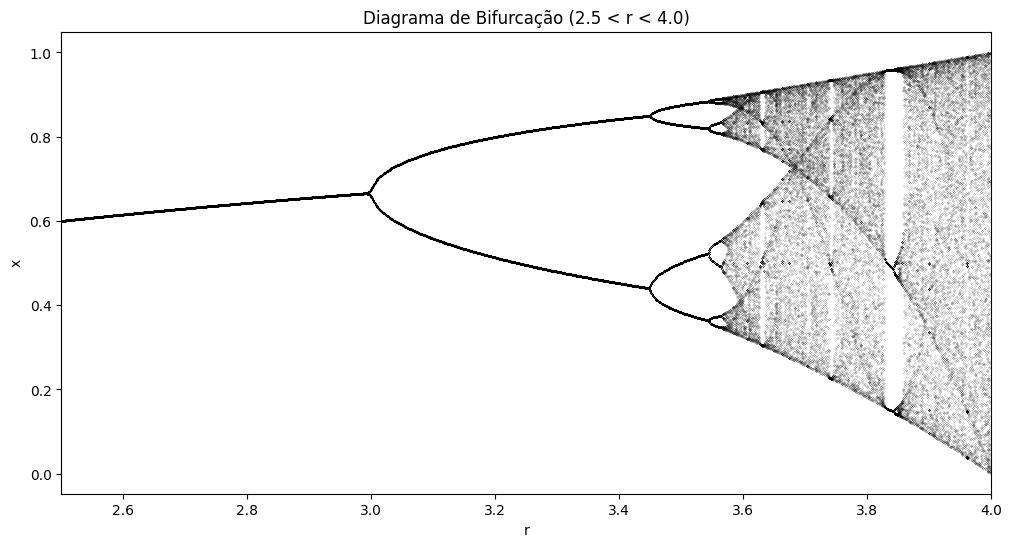

In [10]:
print("Gerando Diagrama de Bifurcação")
r_vals, x_vals = gera_dados_bifurcacao(r_min=2.5, r_max=4.0, r_steps=1000)

plt.figure(figsize=(12, 6))
plt.scatter(r_vals, x_vals, s=0.01, color='black') # Pontos pretos finos
plt.title("Diagrama de Bifurcação (2.5 < r < 4.0)")
plt.xlabel("r")
plt.ylabel("x")
plt.xlim(2.5, 4.0)
plt.show()

Gerando Zoom na Janela de Periodicidade


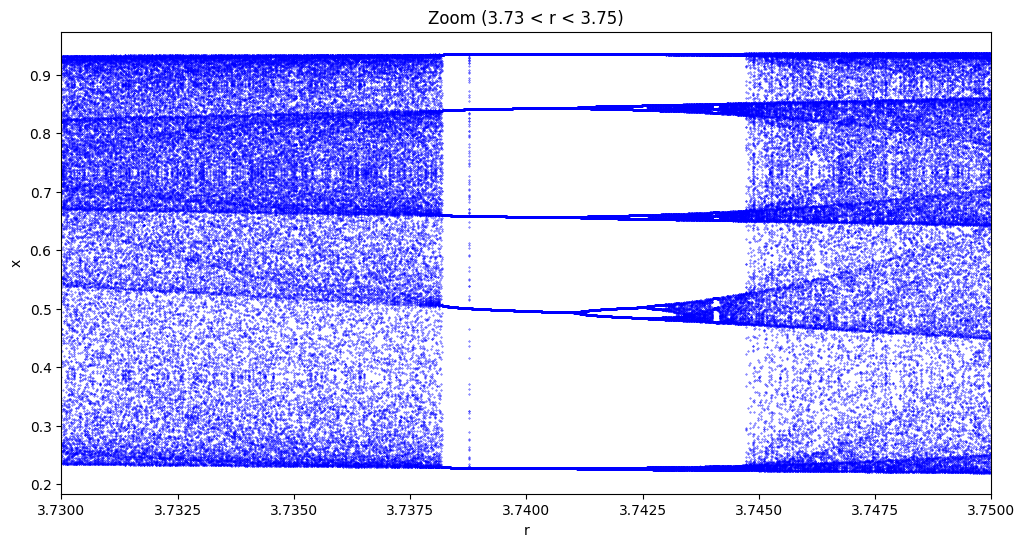

In [11]:
print("Gerando Zoom na Janela de Periodicidade")
# Aumentamos a resolução (r_steps) para o zoom ficar nítido
r_zoom, x_zoom = gera_dados_bifurcacao(r_min=3.73, r_max=3.75, r_steps=1500)

plt.figure(figsize=(12, 6))
plt.scatter(r_zoom, x_zoom, s=0.1, color='blue') # Azul para diferenciar
plt.title("Zoom (3.73 < r < 3.75)")
plt.xlabel("r")
plt.ylabel("x")
plt.xlim(3.73, 3.75)
plt.show()